# Exploratory Data Analysis in Python

👋 Welcome to your workspace! Here, you can write and run Python code and add text in [Markdown](https://www.markdownguide.org/basic-syntax/). Below, we've imported the datasets from the course _Exploratory Data Analysis in Python_ as DataFrames as well as the packages used in the course. This is your sandbox environment: analyze the course datasets further, take notes, or experiment with code!

### Don't know where to start?

Try completing these tasks:
- Begin by calculating the number of rows and columns and displaying the names of columns for each DataFrame. Change any column names for better readability.
- Experiment and compute a correlation matrix for variables in `nsfg`.
- Compute the simple linear regression of `WTKG3` (weight) and `HTM4` (height) in `brfss` (or any other variables you are interested in!). Then, compute the line of best fit and plot it. If the fit doesn't look good, try a non-linear model.

In [149]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf

sns.set_context('talk')

# Importing course datasets as DataFrames
brfss = pd.read_hdf('datasets/brfss.hdf5', 'brfss') # Behavioral Risk Factor Surveillance System (BRFSS) 
gss = pd.read_hdf('datasets/gss.hdf5', 'gss') # General Social Survey (GSS) 
nsfg = pd.read_hdf('datasets/nsfg.hdf5', 'nsfg') # National Survey of Family Growth (NSFG) 

brfss.head() # Display the first five rows
brfss = brfss.dropna()

In [150]:
# renaming the column of weight and height:
brfss.rename(columns= {'WTKG3' : 'WEIGHT' , 'HTM4' : 'HEIGHT', 'INCOME2' : 'INCOME'}, inplace=True)

# DIsplaying columns and shape
print("brfss: ")
print(brfss.shape)
print(brfss.columns)
print()
print("gss: ")
print(gss.shape)
print(gss.columns)
print()
print("nsfg: ")
print(nsfg.shape)
print(nsfg.columns)
print()

brfss: 
(72141, 9)
Index(['SEX', 'HEIGHT', 'WEIGHT', 'INCOME', '_LLCPWT', '_AGEG5YR', '_VEGESU1',
       '_HTMG10', 'AGE'],
      dtype='object')

gss: 
(62466, 10)
Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall'],
      dtype='object')

nsfg: 
(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')



Expermienting correlation Matrix for National Survey of Growth Family

In [151]:
nsfg.corr()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
caseid,1.000000,0.008242,0.031117,0.007099,-0.013421,-0.011034,0.005928,0.005070,-0.004079,-0.010248
outcome,0.008242,1.000000,NaN,NaN,-0.769822,NaN,0.080566,0.013941,NaN,-0.008798
birthwgt_lb1,0.031117,NaN,1.000000,0.033587,0.034431,0.028940,0.000668,0.001307,0.043975,-0.002318
birthwgt_oz1,0.007099,NaN,0.033587,1.000000,0.015756,0.064146,-0.008354,-0.008210,0.021013,0.007592
prglngth,-0.013421,-0.769822,0.034431,0.015756,1.000000,-0.137692,-0.007540,0.050353,-0.025549,0.022063
nbrnaliv,-0.011034,NaN,0.028940,0.064146,-0.137692,1.000000,0.057479,0.056067,0.063696,0.002455
agecon,0.005928,0.080566,0.000668,-0.008354,-0.007540,0.057479,1.000000,0.998897,0.498077,0.088143
agepreg,0.005070,0.013941,0.001307,-0.008210,0.050353,0.056067,0.998897,1.000000,0.497856,0.088440
hpagelb,-0.004079,NaN,0.043975,0.021013,-0.025549,0.063696,0.498077,0.497856,1.000000,0.015616
wgt2013_2015,-0.010248,-0.008798,-0.002318,0.007592,0.022063,0.002455,0.088143,0.088440,0.015616,1.000000


LEts begin to compute the relationship between weight and height, but first we want to look at distributions.

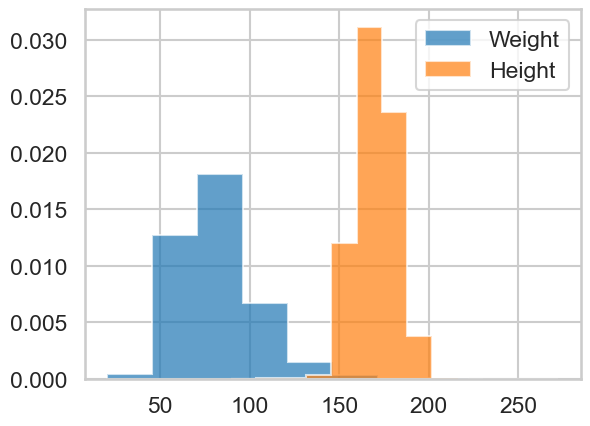

<Figure size 640x480 with 0 Axes>

In [166]:
from locale import normalize
from scipy.stats import norm


plt.hist(brfss['WEIGHT'], label='Weight', alpha=0.7, histtype='stepfilled', density=True, stacked=True)
plt.hist(brfss['HEIGHT'], label='Height', alpha=0.7, histtype='stepfilled', density=True, stacked=True)
plt.legend()
plt.show()
plt.clf()

Now if we take a look at cdfs

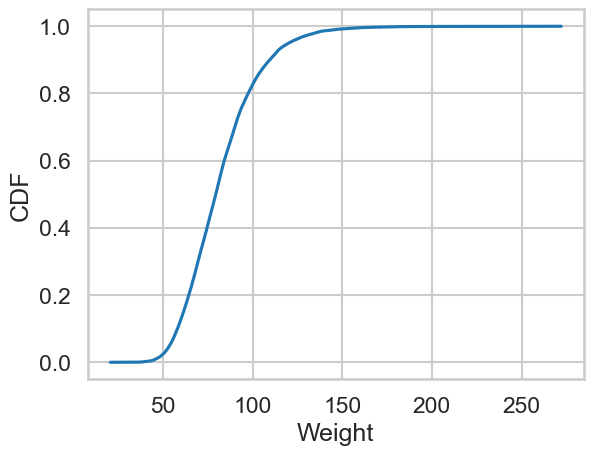

<Figure size 640x480 with 0 Axes>

In [165]:
cdf = brfss['WEIGHT'].dropna().value_counts(normalize=True).sort_index().cumsum()
plt.plot(cdf)
plt.xlabel('Weight')
plt.ylabel('CDF')
plt.show()
plt.clf()

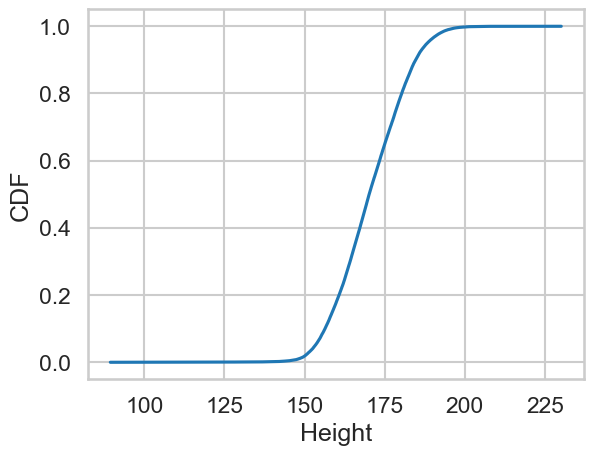

<Figure size 640x480 with 0 Axes>

In [167]:
cdf = brfss['HEIGHT'].dropna().value_counts(normalize=True).sort_index().cumsum()
plt.plot(cdf)
plt.xlabel('Height')
plt.ylabel('CDF')
plt.show()
plt.clf()

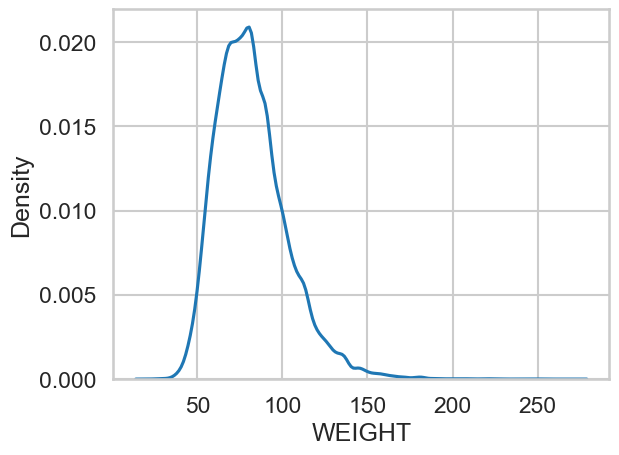

<Figure size 640x480 with 0 Axes>

In [168]:
height = brfss[['WEIGHT']].reset_index()
sns.kdeplot(x='WEIGHT', data=height)
plt.show()
plt.clf()

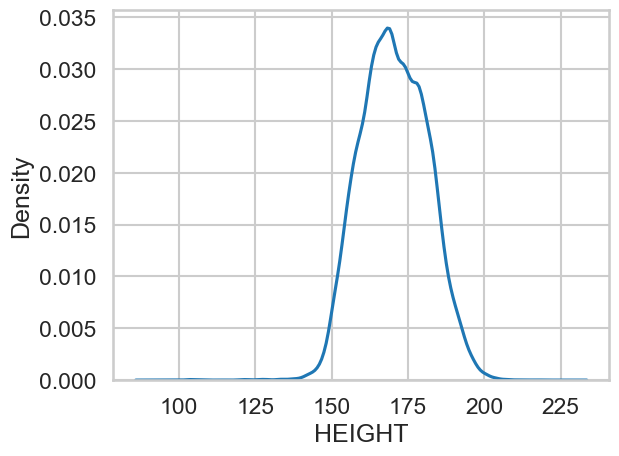

<Figure size 640x480 with 0 Axes>

In [169]:
height = brfss[['HEIGHT']].reset_index()
sns.kdeplot(x='HEIGHT', data=height)
plt.show()
plt.clf()

Lets take a look at relationship of weight and height

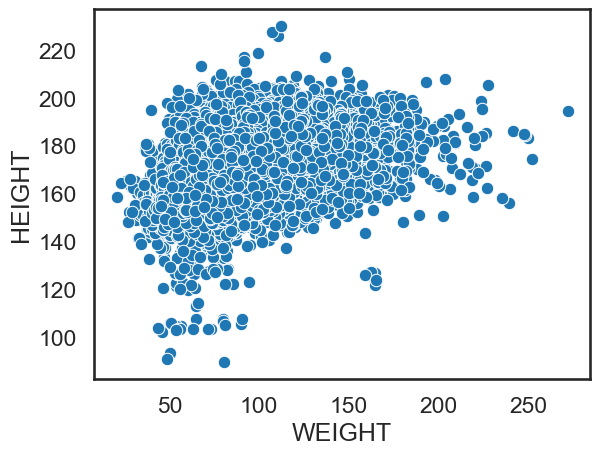

In [170]:
sns.set_style('white')
sns.scatterplot(x='WEIGHT' , y='HEIGHT', data=brfss)
plt.show()

Since it is not visible clearly, so size of marker should be small and let's try juttering

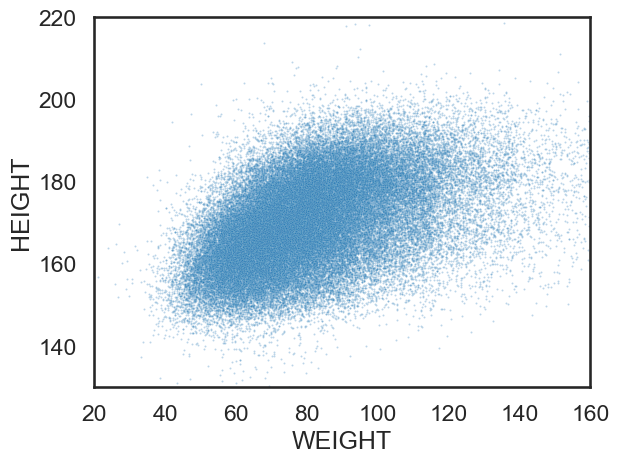

In [171]:
plt.clf()
brfss['WEIGHT'] = brfss['WEIGHT'] + np.random.normal(0, 2, size=len(brfss))
brfss['HEIGHT'] = brfss['HEIGHT'] + np.random.normal(0 , 2 , size=len(brfss))

# Now plot the scatter of weight and height and select required scale
fig = sns.scatterplot(y='HEIGHT' , x='WEIGHT', data=brfss, s=2, alpha=0.3)
plt.xlim(20 , 160)
plt.ylim(130 , 220)
plt.show()

Developing a Linear Relationship

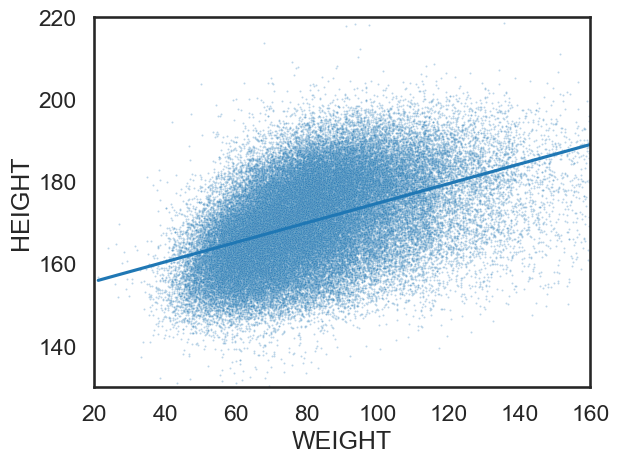

In [172]:
weight = brfss['WEIGHT']
height = brfss['HEIGHT']
model = smf.ols('HEIGHT ~ WEIGHT', data=brfss).fit()
fx = np.array([weight.min(), weight.max()])
fy = model.params['Intercept'] + model.params['WEIGHT'] * fx
plt.plot(fx, fy, '-')
fig = sns.scatterplot(y='HEIGHT' , x='WEIGHT', data=brfss, s=2, alpha=0.3)
plt.xlim(20 , 160)
plt.ylim(130 , 220)
plt.show()

Great , we we know that the weight of the person also depends upon the age and the income so lets try exploring it for males and females

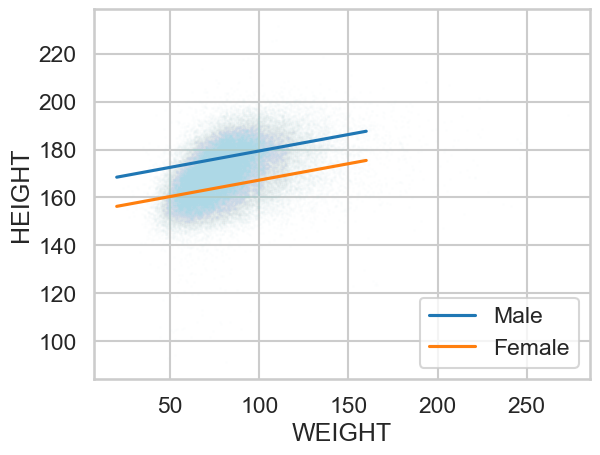

In [173]:
from statistics import mode
from turtle import color


brfss['SEX'].replace(2, 0 , inplace=True)

brfss['WEIGHT2'] = brfss['WEIGHT'] ** 2
brfss['INCOME2'] = brfss['INCOME'] ** 2
brfss['AGE2'] = brfss['AGE'] ** 2
#Compute a multiple Regression
model = smf.ols('HEIGHT ~ WEIGHT + INCOME + INCOME2 + AGE + AGE2 + C(SEX)' , data=brfss).fit()

#Getting median income
median_income = brfss['INCOME'].mean()

# Developing the dataframe
df = pd.DataFrame()
df['WEIGHT'] = np.linspace(20 , 160)
df['WEIGHT2'] = df['WEIGHT'] ** 2
df['INCOME'] = median_income
df['INCOME2'] = df['INCOME'] ** 2
df['AGE'] = 30
df['AGE2'] = df['AGE'] ** 2

# Generating predictions for male
df['SEX'] = 1
pred_male = model.predict(df)

#Generating predictions for female
df['SEX'] = 0
pred_female = model.predict(df)

sns.set_style('whitegrid')
sns.lineplot(x='WEIGHT', y=pred_male, label='Male', data=df)
sns.lineplot(x='WEIGHT' , y=pred_female, data=df, label="Female")
fig = sns.scatterplot(y='HEIGHT' , x='WEIGHT', data=brfss, s=2, alpha=0.03, color='lightblue')
plt.show()

The prediction we generated for male and female for age 30, which is a common age with median income, shows a strong linear relationship and as we can predict, the male will be having more height vs weight on normal income. Let's predict for LOWER INCOME on age 30 keeping constant.

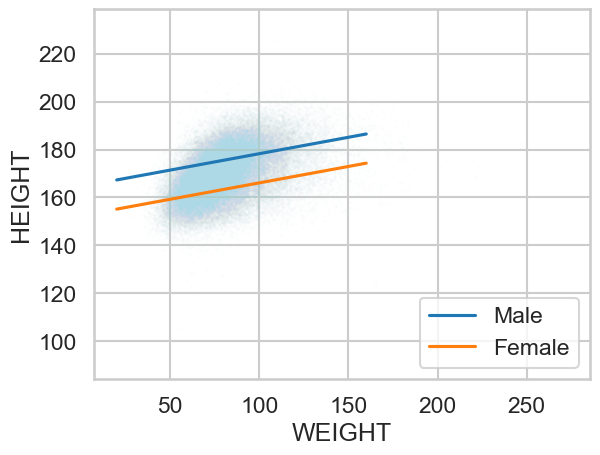

In [174]:
# calling df from previous cell, just updating with the incomes
from operator import mod


twentry_fifth = brfss['INCOME'].quantile(0.25)
df['INCOME'] = twentry_fifth
df['INCOME2'] = df['INCOME']  ** 2

# For male
df['SEX'] = 1
pred_male = model.predict(df)

#For female
df['SEX'] = 0
pred_female = model.predict(df)

sns.lineplot(x='WEIGHT' , y=pred_male, data=df, label='Male')
sns.lineplot(x='WEIGHT' , y=pred_female, data=df, label='Female')
fig = sns.scatterplot(y='HEIGHT' , x='WEIGHT', data=brfss, s=2, alpha=0.03, color='lightblue')

We have constantly getting a strong linear relationship, let's try with HIGHER INCOME. Usually age of 50 have higher incomes, so we will put it into action and predict a model for higher incomes with age 50.

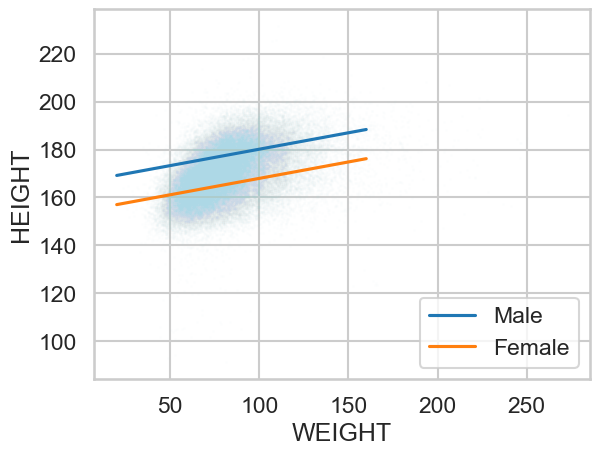

In [175]:
# calling df from previous cell, just updating with the incomes
from operator import mod


twentry_fifth = brfss['INCOME'].quantile(0.75)
df['INCOME'] = twentry_fifth
df['INCOME2'] = df['INCOME']  ** 2
df['AGE'] = 50
df['AGE2'] = df['AGE'] ** 2

# For male
df['SEX'] = 1
pred_male = model.predict(df)

#For female
df['SEX'] = 0
pred_female = model.predict(df)

sns.lineplot(x='WEIGHT' , y=pred_male, data=df, label='Male')
sns.lineplot(x='WEIGHT' , y=pred_female, data=df, label='Female')
fig = sns.scatterplot(y='HEIGHT' , x='WEIGHT', data=brfss, s=2, alpha=0.03, color='lightblue')

We have seen for higher incomes also, these models show that only age and weight are the factor for Heights, Height depends upon a litte decreasing age with strong increasing weight. We can verify the results by boxplot of height vs age.

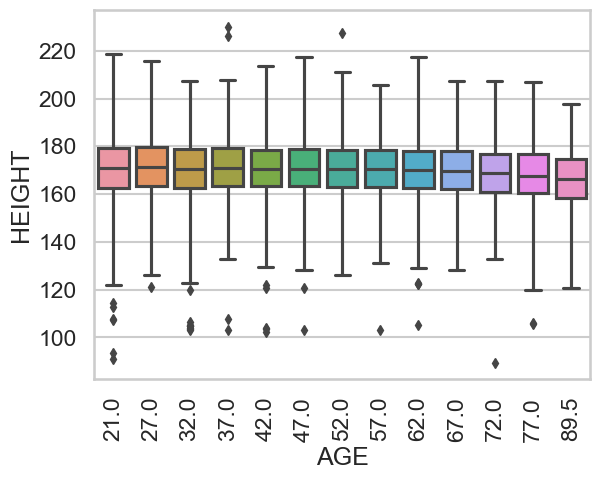

In [163]:
sns.boxplot(x='AGE', y='HEIGHT', data=brfss, whis=2.5)
plt.xticks(rotation=90)
plt.show()

Brfss Correlation:

In [164]:
brfss.corr()

,SEX,HEIGHT,WEIGHT,INCOME,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE,WEIGHT2,INCOME2,AGE2
SEX,1.000000,0.666123,0.359017,0.092581,0.004943,-0.028066,-0.077030,0.652505,-0.028827,0.314589,0.091171,-0.031374
HEIGHT,0.666123,1.000000,0.462767,0.182567,-0.050439,-0.077004,0.002369,0.953097,-0.079434,0.416702,0.183751,-0.086713
WEIGHT,0.359017,0.462767,1.000000,0.022520,-0.044013,0.032899,-0.045243,0.458096,0.027240,0.979372,0.019597,-0.005386
INCOME,0.092581,0.182567,0.022520,1.000000,-0.042116,-0.016801,0.117210,0.179183,-0.020767,0.008310,0.981049,-0.047283
_LLCPWT,0.004943,-0.050439,-0.044013,-0.042116,1.000000,-0.151479,-0.011015,-0.050136,-0.149621,-0.035529,-0.037491,-0.138546
_AGEG5YR,-0.028066,-0.077004,0.032899,-0.016801,-0.151479,1.000000,-0.020002,-0.079367,0.997466,0.021763,-0.024181,0.970404
_VEGESU1,-0.077030,0.002369,-0.045243,0.117210,-0.011015,-0.020002,1.000000,0.002660,-0.019498,-0.040961,0.121747,-0.023292
_HTMG10,0.652505,0.953097,0.458096,0.179183,-0.050136,-0.079367,0.002660,1.000000,-0.081584,0.413807,0.180749,-0.089072
AGE,-0.028827,-0.079434,0.027240,-0.020767,-0.149621,0.997466,-0.019498,-0.081584,1.000000,0.016760,-0.028585,0.981164
WEIGHT2,0.314589,0.416702,0.979372,0.008310,-0.035529,0.021763,-0.040961,0.413807,0.016760,1.000000,0.006360,-0.012612
